In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
train = pd.read_excel("Data_Test.xlsx")
test = pd.read_excel("Data_Train.xlsx")


In [3]:
train.shape

(4231, 8)

In [4]:
test.shape

(12690, 9)

In [5]:
df = pd.concat([train,test])
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Noida,NaN,"North Indian, Chinese, Mughlai, Kebab",Sector 18,4.3,4085,12noon – 12midnight (Mon-Sun),CASUAL DINING,564 votes
1,Mumbai,NaN,"South Indian, Fast Food, Pizza, North Indian",Grant Road,4.2,12680,7am – 12:30AM (Mon-Sun),QUICK BITES,61 votes
2,Mumbai,NaN,"North Indian, Seafood, Biryani, Chinese",Marine Lines,3.8,1411,11am – 11:30pm (Mon-Sun),CASUAL DINING,350 votes
3,Faridabad,NaN,Biryani,NIT,3.8,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",None,1445 votes
4,Kochi,NaN,"South Indian, Kerala",Kaloor,3.6,13453,11am – 10pm (Mon-Sun),QUICK BITES,23 votes


In [6]:
df.shape

(16921, 9)

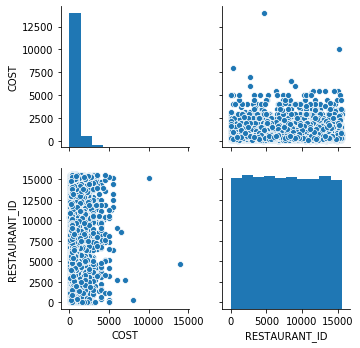

In [7]:
sns.pairplot(df)

In [8]:
#df.duplicated().sum()

In [9]:
#df.drop_duplicates(inplace = True)
df.duplicated().sum()

26

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 9 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB


In [11]:
df.isna().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [12]:
df.shape

(16921, 9)

In [13]:
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('bang',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Bang',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Ker',na=False)]["CITY"].unique(),'kerala')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('JP Nagar',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Mum',na=False)]["CITY"].unique(),'Mumbai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Bandra',na=False)]["CITY"].unique(),'Mumbai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Andheri',na=False)]["CITY"].unique(),'Mumbai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Maharashtra',na=False)]["CITY"].unique(),'Mumbai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Chen',na=False)]["CITY"].unique(),'Chennai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('chen',na=False)]["CITY"].unique(),'Chennai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Tamil',na=False)]["CITY"].unique(),'Chennai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Anna Salai',na=False)]["CITY"].unique(),'Chennai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Tambaram',na=False)]["CITY"].unique(),'Chennai')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Tela',na=False)]["CITY"].unique(),'Telangana')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Delhi',na=False)]["CITY"].unique(),'Delhi')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Karnataka',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Bengalore',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Bengalore',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Bengaluru',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Marathahalli',na=False)]["CITY"].unique(),'Bangalore')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Kochi',na=False)]["CITY"].unique(),'Kochi')
df['CITY'] = df['CITY'].replace(df[df['CITY'].str.contains('Hyder',na=False)]["CITY"].unique(),'Hyderabad')

In [14]:
df["CITY"].unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad', 'Chennai',
       'Delhi', 'Bangalore', 'Gurgaon', 'Palarivattom', 'Ernakulam',
       'Thane West', 'Ghaziabad', 'Thane', 'Telangana', 'Potheri',
       'Panathur Main Road', 'Secunderabad', nan,
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'APR Chambers', 'India', 'Serilingampally', 'Gandhinagar Rd',
       'HSR Layout', 'Greater Noida', 'Uttar Pradesh', 'Dwarka',
       'Velachery', 'Anna Nagar West', 'Indiranagar', 'Whitefield',
       'kerala', 'Madhapur', '1st Stage', 'Powai', 'Kaloor', 'kochi',
       'Gurugram', '682024', 'Tripunithura', 'Kakkanad', 'Girgaum',
       'Kurla (W)', 'Secunderabad.', 'Thane West Thane West',
       'Banjara Hills', 'Marad', 'Near Sector 34', 'Nallagandla',
       'Vandalur', 'Mulund West', 'Secunderbad', 'MM Nagar',
       'Dilsukhnagar', 'Chittethukkara', 'BTM', 'Dombivli',
       'Sahakara Nagar', 'Tavarekere Main Road', 'Community Centre',
       'Delh.', '

In [15]:
#df1=df.query(" CITY  not in ('Secunderabad','Ghaziabad','Telangana','Chennai','Bangalore','Noida','Mumbai','Kochi','Hyderabad','Delhi','Gurgaon','Faridabad','Ernakulam')")#.drop#["CITY"]

In [16]:
#df = df[~df.index.isin(df1.index)]

In [17]:
df["CITY"].unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad', 'Chennai',
       'Delhi', 'Bangalore', 'Gurgaon', 'Palarivattom', 'Ernakulam',
       'Thane West', 'Ghaziabad', 'Thane', 'Telangana', 'Potheri',
       'Panathur Main Road', 'Secunderabad', nan,
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'APR Chambers', 'India', 'Serilingampally', 'Gandhinagar Rd',
       'HSR Layout', 'Greater Noida', 'Uttar Pradesh', 'Dwarka',
       'Velachery', 'Anna Nagar West', 'Indiranagar', 'Whitefield',
       'kerala', 'Madhapur', '1st Stage', 'Powai', 'Kaloor', 'kochi',
       'Gurugram', '682024', 'Tripunithura', 'Kakkanad', 'Girgaum',
       'Kurla (W)', 'Secunderabad.', 'Thane West Thane West',
       'Banjara Hills', 'Marad', 'Near Sector 34', 'Nallagandla',
       'Vandalur', 'Mulund West', 'Secunderbad', 'MM Nagar',
       'Dilsukhnagar', 'Chittethukkara', 'BTM', 'Dombivli',
       'Sahakara Nagar', 'Tavarekere Main Road', 'Community Centre',
       'Delh.', '

In [18]:
df.shape

(16921, 9)

In [19]:
CUISINES=df['CUISINES'].str.get_dummies(sep=',')
CITY=df['CITY'].str.get_dummies()
TITLE=df['TITLE'].str.get_dummies()
df['VOTES']=df['VOTES'].str.split(expand=True)[0]

In [20]:
df


,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Noida,NaN,"North Indian, Chinese, Mughlai, Kebab",Sector 18,4.3,4085,12noon – 12midnight (Mon-Sun),CASUAL DINING,564
1,Mumbai,NaN,"South Indian, Fast Food, Pizza, North Indian",Grant Road,4.2,12680,7am – 12:30AM (Mon-Sun),QUICK BITES,61
2,Mumbai,NaN,"North Indian, Seafood, Biryani, Chinese",Marine Lines,3.8,1411,11am – 11:30pm (Mon-Sun),CASUAL DINING,350
3,Faridabad,NaN,Biryani,NIT,3.8,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",None,1445
4,Kochi,NaN,"South Indian, Kerala",Kaloor,3.6,13453,11am – 10pm (Mon-Sun),QUICK BITES,23
...,...,...,...,...,...,...,...,...,...
12685,Hyderabad,500.0,"North Indian, Burger, Kebab",Gachibowli,3.8,13228,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",QUICK BITES,546
12686,Mumbai,1800.0,"Goan, Continental",Bandra Kurla Complex,4.3,9686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...","CASUAL DINING,BAR",1214
12687,Mumbai,1300.0,"Finger Food, Continental, Asian, Chinese",Vashi,4.0,11133,12noon – 12:30AM (Mon-Sun),LOUNGE,608
12688,Chennai,400.0,"North Indian, South Indian, Chinese, Street Food",Maduravoyal,3.5,6134,6am – 10:45pm (Mon-Sun),CASUAL DINING,32


In [21]:
df["RATING"].fillna(df.RATING.mode()[0],inplace = True)
df["VOTES"].fillna(df.VOTES.mode()[0],inplace = True)
df["RATING"].fillna(df.RATING.mode()[0],inplace = True)


In [22]:
df.RATING.replace({"-":"0.1","NEW":"0.1"},inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 9 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16921 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB


In [24]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Noida,NaN,"North Indian, Chinese, Mughlai, Kebab",Sector 18,4.3,4085,12noon – 12midnight (Mon-Sun),CASUAL DINING,564
1,Mumbai,NaN,"South Indian, Fast Food, Pizza, North Indian",Grant Road,4.2,12680,7am – 12:30AM (Mon-Sun),QUICK BITES,61
2,Mumbai,NaN,"North Indian, Seafood, Biryani, Chinese",Marine Lines,3.8,1411,11am – 11:30pm (Mon-Sun),CASUAL DINING,350
3,Faridabad,NaN,Biryani,NIT,3.8,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",None,1445
4,Kochi,NaN,"South Indian, Kerala",Kaloor,3.6,13453,11am – 10pm (Mon-Sun),QUICK BITES,23


In [25]:
df=df.drop(columns = ["CUISINES","TITLE","CITY","TIME","RESTAURANT_ID","LOCALITY"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 3 columns):
COST      12690 non-null float64
RATING    16921 non-null object
VOTES     16921 non-null object
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [27]:
df['RATING']=df['RATING'].astype(object).astype(float)
df['VOTES']=df['VOTES'].astype(object).astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Data columns (total 3 columns):
COST      12690 non-null float64
RATING    16921 non-null float64
VOTES     16921 non-null float64
dtypes: float64(3)
memory usage: 1.1 MB


In [29]:
df = pd.concat([df,CUISINES,TITLE,CITY],axis="columns")
df_preprocced=df

In [30]:
df.head()

,COST,RATING,VOTES,,Afghan,African,American,Andhra,Arabian,Asian,...,chullickal,hyderabad,kerala,khar west,kochi,navi mumbai,opp gurudwara Shakurpur,opp mukteshwar ashram powai,opposite to western side of ITPL Service gate,ward X11
0,NaN,4.3,564.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,4.2,61.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,3.8,350.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,3.8,1445.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,3.6,23.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape

(16921, 627)

In [32]:
df_preprocced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 12689
Columns: 627 entries, COST to ward X11
dtypes: float64(3), int64(624)
memory usage: 81.7 MB


In [33]:
train_preprocessed = df_preprocced[df_preprocced["COST"].notna()]
test_preprocessed = df_preprocced[df_preprocced["COST"].isna()]

In [34]:
train_preprocessed.shape

(12690, 627)

In [35]:
test_preprocessed.shape

(4231, 627)

In [36]:
del test_preprocessed["COST"]
test_preprocessed.shape

(4231, 626)

In [37]:
test_preprocessed.shape

(4231, 626)

In [38]:
train_preprocessed.shape

(12690, 627)

In [39]:
#--------------Train Test Split on Train_preprocessed-----------------

In [40]:
X = train_preprocessed.drop(columns=["COST"])

In [41]:
y = train_preprocessed["COST"]

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [43]:
import pandas_profiling
pandas_profiling.ProfileReport(train_y)

In [44]:
train_y.shape

(8883,)

In [45]:
linear = LinearRegression()
linear.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
linear.coef_

array([ 1.98049372e+01,  4.48428271e-02,  9.28002358e+01,  6.09557004e+01,
        1.11549753e-07, -6.81045146e+01,  3.18578737e+01, -4.18710614e+01,
        1.19231674e+01, -2.71571601e-08,  3.19745915e+02,  6.23317381e+01,
        3.60652848e+01,  2.53355127e+02,  9.00772801e+02, -9.28498023e+00,
       -1.54946587e+01, -1.72166545e+02, -9.84386136e+00,  3.71882930e+00,
        7.81620094e+00, -8.33657792e+00, -8.27782772e+01,  1.02544203e+02,
        2.33822597e+01,  5.48735881e-01,  1.19780774e+01,  2.44495025e+01,
       -3.30281748e+01,  1.11837916e+01, -8.69817866e+01,  9.28225173e+01,
       -2.13424300e-09, -3.93673516e+00,  1.35375971e+02, -9.74040404e-10,
       -1.86554416e-08,  2.48476333e+02, -3.71466058e-09, -4.03692833e+01,
       -5.19647843e+01, -5.82775783e-09,  1.20275723e+02, -1.71847385e+02,
        8.40006675e+02,  1.07042087e+02, -9.23275099e+01,  5.35600420e+00,
       -5.71434447e+01, -1.37211487e-09, -4.10915300e+00,  1.99958095e-09,
       -2.36590872e+01, -

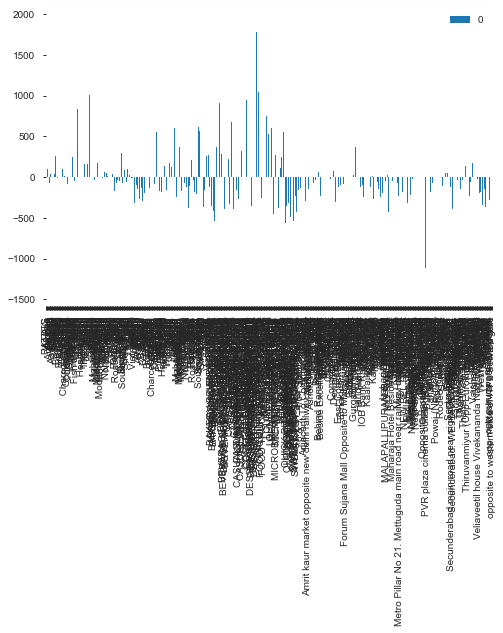

In [47]:
pd.DataFrame(linear.coef_,train_X.columns).plot(kind = "bar")

In [48]:
train_predict = linear.predict(train_X)

In [49]:
test_predict = linear.predict(test_X)

In [50]:
np.sqrt(mean_squared_error(train_predict,train_y))

295.6407965990787

In [51]:
np.sqrt(mean_squared_error(test_predict,test_y))

388.8014693787626

In [52]:
train_predict,test_predict

(array([ 207.93889289,  272.85478606,  374.25406928, ...,  914.98635108,
        1109.7998961 ,  552.97217622]),
 array([ 383.97420243,  418.14138379, 1468.85675329, ...,  403.51147566,
         623.87356339,  755.93211084]))

In [53]:
def model_fit(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X)#.drop(columns=["COST"]))
    test_pred_df = pd.DataFrame(test_hack_predict,columns= ["COST"])
    #result = pd.concat([test_X,test_pred_df] ,axis = 1)
    test_pred_df.to_excel(filename,index = False)
    

In [54]:
def model_fit_poly(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    #pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    #print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    #print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X)
    test_pred_df = pd.DataFrame(test_hack_predict)#,columns= ["COST"])
    result = pd.concat([test_preprocessed,test_pred_df] ,axis = 1)
    result.to_excel(filename,index = False)

Train RMSE :  295.6407965990787
Test RMSE :  388.8014693787626


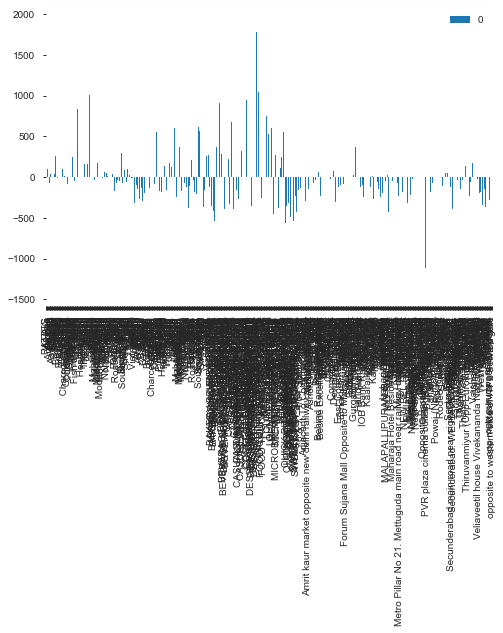

In [55]:
model_fit(linear,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"linear_solution.xlsx")

In [56]:
lass = Lasso(alpha=0.6, normalize=True)

Train RMSE :  401.99279734363176
Test RMSE :  470.26164797280336


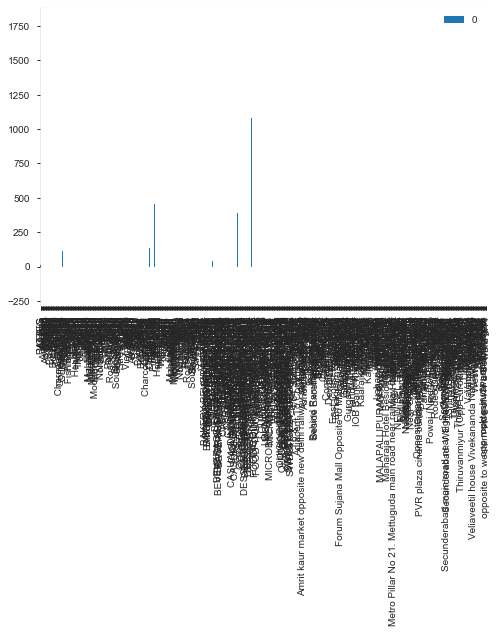

In [57]:
model_fit(lass,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"lasso_solution.xlsx")

In [58]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(n_estimators=1000)


In [59]:
random_regressor.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [60]:
train_pred = random_regressor.predict(train_X)

In [61]:
np.sqrt(mean_squared_error(train_y, train_pred))

117.33214041885914

In [62]:
test_pred = random_regressor.predict(test_X)

In [63]:
np.sqrt(mean_squared_error(test_y, test_pred))

389.85706350412323

In [64]:
feature_imp = pd.DataFrame([train_X.columns,random_regressor.feature_importances_]).T

In [65]:
feature_imp.columns = ["col", "feature_imp"]

In [66]:
feature_imp.sort_values(by="feature_imp",ascending=False,inplace=True)

In [67]:
imp_feature =  list(feature_imp.head(60).col)

In [68]:
random_regressor.fit(train_X[imp_feature], train_y)

print(np.sqrt(mean_squared_error(train_y, train_pred)))

test_pred = random_regressor.predict(test_X[imp_feature])

print(np.sqrt(mean_squared_error(test_y, test_pred)))

117.33214041885914
394.4138594681873


Train RMSE :  401.99724573666373
Test RMSE :  470.2654458576163


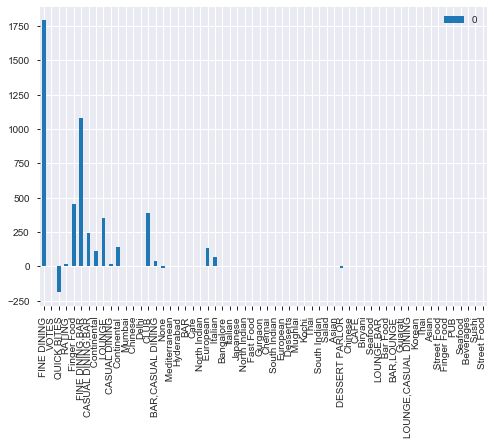

In [69]:
model_fit(lass,train_X[imp_feature],test_X[imp_feature],train_y,test_y,X[imp_feature],y,test_preprocessed[imp_feature],"lasso_solution_imp.xlsx")

In [70]:
def model_fit_no_coef(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    #pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X)#.drop(columns=["COST"]))
    test_pred_df = pd.DataFrame(test_hack_predict,columns= ["COST"])
    #result = pd.concat([test_X,test_pred_df] ,axis = 1)
    test_pred_df.to_excel(filename,index = False)
    

In [71]:
from sklearn.ensemble import AdaBoostRegressor

In [72]:
ada = AdaBoostRegressor(n_estimators=300)

In [73]:
model_fit_no_coef(ada,train_X[imp_feature],test_X[imp_feature],train_y,test_y,X[imp_feature],y,test_preprocessed[imp_feature],"ada_imp.xlsx")

Train RMSE :  934.4678572678436
Test RMSE :  967.1146591295965


In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gbm = GradientBoostingRegressor()

In [76]:
model_fit_no_coef(gbm,train_X[imp_feature],test_X[imp_feature],train_y,test_y,X[imp_feature],y,test_preprocessed[imp_feature],"gbm_imp.xlsx")

Train RMSE :  292.50269376029917
Test RMSE :  400.21123520885993


In [77]:
model_fit_no_coef(gbm,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"gbm_imp.xlsx")

Train RMSE :  291.312631751435
Test RMSE :  397.2883744432344


In [78]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [79]:
model_fit_no_coef(dtree,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"dtree.xlsx")

Train RMSE :  22.43598248887191
Test RMSE :  482.09246162844346


In [80]:
model_fit_no_coef(dtree,train_X[imp_feature],test_X[imp_feature],train_y,test_y,X[imp_feature],y,test_preprocessed[imp_feature],"dtreeimp.xlsx")

Train RMSE :  29.534046157714553
Test RMSE :  477.79032759481595


In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=50)

In [82]:
model_fit_no_coef(knn,train_X[imp_feature],test_X[imp_feature],train_y,test_y,X[imp_feature],y,test_preprocessed[imp_feature],"knnimp.xlsx")

Train RMSE :  552.033284632185
Test RMSE :  613.5858840718471


In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor





In [84]:
from sklearn.tree import DecisionTreeRegressor
dtree_30 = DecisionTreeRegressor(max_depth=30)
dtree_40 = DecisionTreeRegressor(max_depth=40)
dtree_50 = DecisionTreeRegressor(max_depth=50)
dtree_60 = DecisionTreeRegressor(max_depth=60)


In [85]:

er = VotingRegressor([ ('dt2', dtree_60), ('dt3', dtree_40), ('dt4', dtree_50)])
er.fit(X[imp_feature],y)
er.predict(X[imp_feature])

array([1200.        , 1500.        ,  800.        , ..., 1300.        ,
        400.        ,  629.62962963])

In [86]:
test_pred = er.predict(test_preprocessed[imp_feature])

In [87]:
voting = pd.DataFrame([test_pred]).T

In [88]:
voting.columns = ["COST"]

In [89]:
voting.to_excel("voting_reg.xlsx", index = False)

In [91]:
from sklearn.ensemble import StackingRegressor

ImportError: cannot import name 'StackingRegressor' from 'sklearn.ensemble' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
pip install scikit-learn


In [92]:
import sklearn

In [93]:
print(sklearn.__version__)

0.21.3
